**Importing libraries.**

In [1]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import difflib #for closest name
from sklearn.feature_extraction.text import TfidfVectorizer   #for catagorization
from sklearn.metrics.pairwise import cosine_similarity    #for checking similarity

In [2]:
from google.colab import drive
drive.mount('/content/drive')  #mounting my drive

Mounted at /content/drive


In [3]:
import os
directory = "/content/drive/MyDrive/CSE422/CSE 422 Lab project"  #setting directory
os.chdir(directory)  

**Data collection and preprocessing.**

In [4]:
# Reading the dataset.
dataset = pd.read_csv("Dataset.csv")

<BarContainer object of 12 artists>

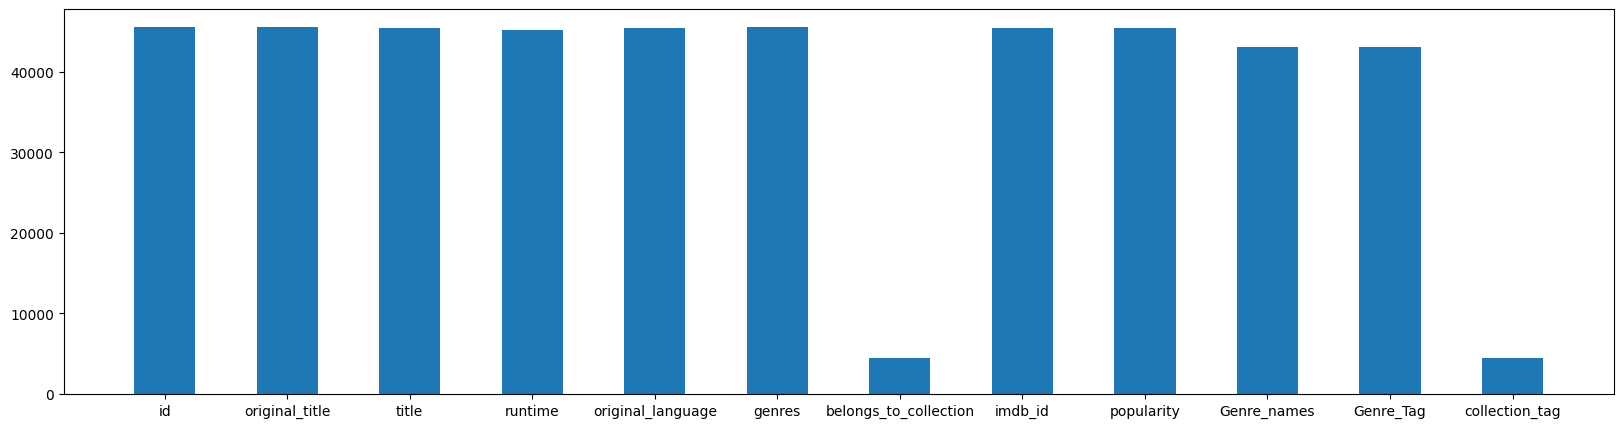

In [5]:
# Bar plot of data points for each feature. 
columns = dataset.columns.tolist()
height = dataset.count().tolist()
plt.figure(figsize = (20,5))
plt.bar(columns, height, width=0.5)

In [6]:
# column_name frequency_of_nan_values
dataset.isnull().sum()

id                           0
original_title               0
title                        6
runtime                    263
original_language           11
genres                       0
belongs_to_collection    40972
imdb_id                     17
popularity                   5
Genre_names               2442
Genre_Tag                 2442
collection_tag           40975
dtype: int64

In [7]:
# Replacing nan values with -50
dataset = dataset.fillna(-50)
dataset.isnull().sum()

id                       0
original_title           0
title                    0
runtime                  0
original_language        0
genres                   0
belongs_to_collection    0
imdb_id                  0
popularity               0
Genre_names              0
Genre_Tag                0
collection_tag           0
dtype: int64

<ipython-input-29-527284898fcf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = dataset.corr()


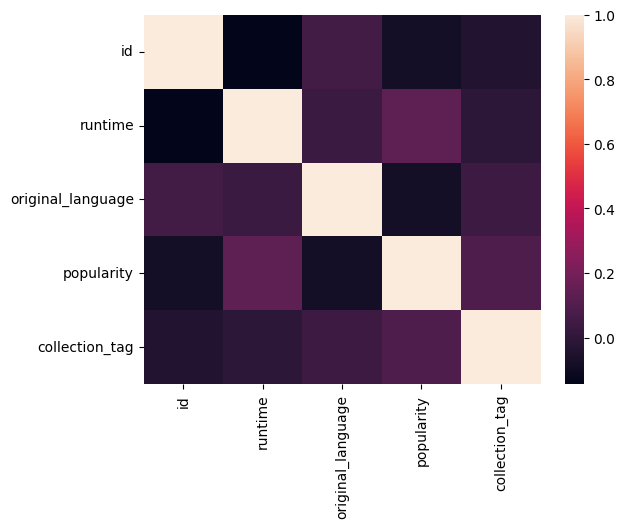

In [29]:
# Correlation using seaborn library. 
correlations = dataset.corr()

%matplotlib inline
import seaborn as sns
sns.heatmap(correlations)
plt.show()

**Encoding categorical features.**

In [9]:
# Unique values of each category. 
print(dataset.nunique())

id                       45436
original_title           43371
title                    42276
runtime                    354
original_language           93
genres                    4069
belongs_to_collection     1699
imdb_id                  45418
popularity               43759
Genre_names               4069
Genre_Tag                 4069
collection_tag            1696
dtype: int64


In [10]:
# Converting object type of 'original_language', 'id'.
dataset['original_language'] = dataset['original_language'].astype(str)

dataset['id'] = pd.to_numeric(dataset['id'], errors='coerce') 
dataset.dropna(inplace=True)
dataset['id'] = dataset['id'].astype(int)

In [11]:
# Label Encoding: assigning a value to each categorical value. 
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object.
lenc = LabelEncoder()
dataset['original_language'] = lenc.fit_transform(dataset['original_language'])
# Save the preprocessed data to a new CSV file. 
dataset.to_csv("Dataset v2.csv", index=False)

**Dataset Splitting**

In [12]:
dataset.head()

,id,original_title,title,runtime,original_language,genres,belongs_to_collection,imdb_id,popularity,Genre_names,Genre_Tag,collection_tag
0,2,Ariel,Ariel,69.0,24,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",-50,tt0094675,3.860491,Drama Crime,"18 , 80",-50.0
1,3,Varjoja paratiisissa,Shadows in Paradise,76.0,24,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",-50,tt0092149,2.29211,Drama Comedy,"18 , 35",-50.0
2,5,Four Rooms,Four Rooms,98.0,18,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",-50,tt0113101,9.026586,Crime Comedy,"80 , 35",-50.0
3,6,Judgment Night,Judgment Night,110.0,18,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",-50,tt0107286,5.538671,Action Thriller Crime,"28 , 53 , 80",-50.0
4,11,Star Wars,Star Wars,121.0,18,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","{'id': 10, 'name': 'Star Wars Collection', 'po...",tt0076759,42.149697,Adventure Action Science Fiction,"12 , 28 , 878",10.0


In [13]:
# Deleting Values that are not numerical
dataset['popularity'] = pd.to_numeric(dataset['popularity'], errors='coerce')
dataset.dropna(inplace=True)
print(dataset['popularity'].dtype)

float64


In [14]:
x=dataset['id']
y=dataset[['popularity','original_language']]

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=10)

In [17]:
x_train

2838       8356
28395     91041
17657     42991
17429     42554
9173      20329
          ...  
40062    281506
28020     87719
29202     98116
40064    281556
17676     43015
Name: id, Length: 36370, dtype: int64

In [18]:
y_train

,popularity,original_language
2838,9.813419,18
28395,0.000011,59
17657,0.405950,18
17429,0.477627,18
9173,8.271179,37
...,...,...
40062,1.308219,18
28020,0.001429,18
29202,0.520118,18
40064,0.003965,18


**KNN(K NEAREST NEIGHBORS)**

In [19]:
the_dataset=dataset.copy()
the_dataset

,id,original_title,title,runtime,original_language,genres,belongs_to_collection,imdb_id,popularity,Genre_names,Genre_Tag,collection_tag
0,2,Ariel,Ariel,69.0,24,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",-50,tt0094675,3.860491,Drama Crime,"18 , 80",-50.0
1,3,Varjoja paratiisissa,Shadows in Paradise,76.0,24,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",-50,tt0092149,2.292110,Drama Comedy,"18 , 35",-50.0
2,5,Four Rooms,Four Rooms,98.0,18,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",-50,tt0113101,9.026586,Crime Comedy,"80 , 35",-50.0
3,6,Judgment Night,Judgment Night,110.0,18,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",-50,tt0107286,5.538671,Action Thriller Crime,"28 , 53 , 80",-50.0
4,11,Star Wars,Star Wars,121.0,18,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","{'id': 10, 'name': 'Star Wars Collection', 'po...",tt0076759,42.149697,Adventure Action Science Fiction,"12 , 28 , 878",10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45461,465044,Abduction,Abduction,90.0,18,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",-50,tt5943940,0.281008,Fantasy Drama,"14 , 18",-50.0
45462,467731,Tragedy in a Temporary Town,Tragedy in a Temporary Town,60.0,18,"[{'id': 18, 'name': 'Drama'}]",-50,tt0507700,0.001189,Drama,18,-50.0
45463,468343,Silja - nuorena nukkunut,Silja - nuorena nukkunut,87.0,24,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",-50,tt0133202,0.001202,Drama Romance,"18 , 10749",-50.0
45464,468707,Lauri MÃ¤ntyvaaran tuuheet ripset,Thick Lashes of Lauri MÃ¤ntyvaara,90.0,24,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",-50,tt5742932,0.347806,Romance Comedy,"10749 , 35",-50.0


In [20]:
the_dataset["Genre_Tag"] = the_dataset["Genre_Tag"].str.split(",") 
the_dataset

,id,original_title,title,runtime,original_language,genres,belongs_to_collection,imdb_id,popularity,Genre_names,Genre_Tag,collection_tag
0,2,Ariel,Ariel,69.0,24,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",-50,tt0094675,3.860491,Drama Crime,"[ 18 , 80 ]",-50.0
1,3,Varjoja paratiisissa,Shadows in Paradise,76.0,24,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",-50,tt0092149,2.292110,Drama Comedy,"[ 18 , 35 ]",-50.0
2,5,Four Rooms,Four Rooms,98.0,18,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",-50,tt0113101,9.026586,Crime Comedy,"[ 80 , 35 ]",-50.0
3,6,Judgment Night,Judgment Night,110.0,18,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",-50,tt0107286,5.538671,Action Thriller Crime,"[ 28 , 53 , 80 ]",-50.0
4,11,Star Wars,Star Wars,121.0,18,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...","{'id': 10, 'name': 'Star Wars Collection', 'po...",tt0076759,42.149697,Adventure Action Science Fiction,"[ 12 , 28 , 878 ]",10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45461,465044,Abduction,Abduction,90.0,18,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",-50,tt5943940,0.281008,Fantasy Drama,"[ 14 , 18 ]",-50.0
45462,467731,Tragedy in a Temporary Town,Tragedy in a Temporary Town,60.0,18,"[{'id': 18, 'name': 'Drama'}]",-50,tt0507700,0.001189,Drama,[18],-50.0
45463,468343,Silja - nuorena nukkunut,Silja - nuorena nukkunut,87.0,24,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",-50,tt0133202,0.001202,Drama Romance,"[ 18 , 10749 ]",-50.0
45464,468707,Lauri MÃ¤ntyvaaran tuuheet ripset,Thick Lashes of Lauri MÃ¤ntyvaara,90.0,24,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",-50,tt5742932,0.347806,Romance Comedy,"[ 10749 , 35 ]",-50.0


In [21]:
the_dataset = the_dataset.explode("Genre_Tag") 
the_dataset

,id,original_title,title,runtime,original_language,genres,belongs_to_collection,imdb_id,popularity,Genre_names,Genre_Tag,collection_tag
0,2,Ariel,Ariel,69.0,24,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",-50,tt0094675,3.860491,Drama Crime,18,-50.0
0,2,Ariel,Ariel,69.0,24,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",-50,tt0094675,3.860491,Drama Crime,80,-50.0
1,3,Varjoja paratiisissa,Shadows in Paradise,76.0,24,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",-50,tt0092149,2.292110,Drama Comedy,18,-50.0
1,3,Varjoja paratiisissa,Shadows in Paradise,76.0,24,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",-50,tt0092149,2.292110,Drama Comedy,35,-50.0
2,5,Four Rooms,Four Rooms,98.0,18,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",-50,tt0113101,9.026586,Crime Comedy,80,-50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45463,468343,Silja - nuorena nukkunut,Silja - nuorena nukkunut,87.0,24,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",-50,tt0133202,0.001202,Drama Romance,10749,-50.0
45464,468707,Lauri MÃ¤ntyvaaran tuuheet ripset,Thick Lashes of Lauri MÃ¤ntyvaara,90.0,24,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",-50,tt5742932,0.347806,Romance Comedy,10749,-50.0
45464,468707,Lauri MÃ¤ntyvaaran tuuheet ripset,Thick Lashes of Lauri MÃ¤ntyvaara,90.0,24,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",-50,tt5742932,0.347806,Romance Comedy,35,-50.0
45465,469172,Manoel dans l'Ã®le des merveilles,Manuel on the Island of Wonders,130.0,63,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",-50,tt0089018,0.001097,Fantasy Drama,14,-50.0


In [22]:
combine_movie_rating =the_dataset.dropna(axis=0, subset=['id'])
movie_genreCount=(combine_movie_rating.groupby(by=['id'])['Genre_Tag'].count().reset_index().rename(columns={'Genre_Tag':'total_genre_count'})[['id','total_genre_count']])
movie_genreCount

,id,total_genre_count
0,2,2
1,3,2
2,5,2
3,6,3
4,11,3
...,...,...
45428,465044,2
45429,467731,1
45430,468343,2
45431,468707,2


In [23]:
dataset1=combine_movie_rating.merge(movie_genreCount, left_on='id', right_on= 'id', how='right')
dataset1.head()

,id,original_title,title,runtime,original_language,genres,belongs_to_collection,imdb_id,popularity,Genre_names,Genre_Tag,collection_tag,total_genre_count
0,2,Ariel,Ariel,69.0,24,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",-50,tt0094675,3.860491,Drama Crime,18,-50.0,2
1,2,Ariel,Ariel,69.0,24,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",-50,tt0094675,3.860491,Drama Crime,80,-50.0,2
2,3,Varjoja paratiisissa,Shadows in Paradise,76.0,24,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",-50,tt0092149,2.292110,Drama Comedy,18,-50.0,2
3,3,Varjoja paratiisissa,Shadows in Paradise,76.0,24,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",-50,tt0092149,2.292110,Drama Comedy,35,-50.0,2
4,5,Four Rooms,Four Rooms,98.0,18,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",-50,tt0113101,9.026586,Crime Comedy,80,-50.0,2


In [24]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(movie_genreCount['total_genre_count'].describe()) 

count   45433.000
mean        2.005
std         1.135
min         0.000
25%         1.000
50%         2.000
75%         3.000
max        10.000
Name: total_genre_count, dtype: float64


In [25]:
movie_features_df=dataset1.pivot_table(index='id', columns='Genre_Tag', values='popularity').fillna(0)
movie_features_df

Genre_Tag,10402,10749,10751,10752,10769,10770,12,14,16,18,...,27,28,35,36,37,53,80,878,9648,99
id,,,,,,,,,,,,,,,,,,,,,
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.860,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.292,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
6,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
11,0.000,0.000,0.000,0.000,0.000,0.000,42.150,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465044,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.281,0.000,0.281,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
467731,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
468343,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [26]:

from scipy.sparse import csr_matrix
movie_features_df_matrix= csr_matrix(movie_features_df.values)
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric= 'cosine', algorithm= 'brute')
model_knn.fit(movie_features_df_matrix) 

NearestNeighbors(algorithm='brute', metric='cosine')

In [27]:
query_index = np.random.choice(movie_features_df.shape[0])
print(query_index)
distance, indices = model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 6)

11369


In [28]:
list=[]
list1=[]
list2=[]
for i in range(0, len(distance.flatten())):
  if i==0:
    list.append(movie_features_df.index[query_index])
  else:
    list.append(movie_features_df.index[indices.flatten()[i]])
    list2.append(distance.flatten()[i])

# print(list)
for i in range(0,6):
  for count in range(0,len(dataset)):
    if list[i]==dataset.iat[count,0]:
      list1.append(dataset.iat[count, 2])
# print(list1)
# print(list2)
print("Recommendation for:",list1[0])
for count in range(1,len(list1)):
  print(count,".",list1[count],", Distance:",list2[count-1])

Recommendation for: Jack Frost
1 . The Ball , Distance: 0.0
2 . Coming Home for Christmas , Distance: 0.0
3 . The Adventures of Mickey Matson and the Copperhead Conspiracy , Distance: 0.0
4 . More About the Children of Noisy Village , Distance: 0.0
5 . Winky's Horse , Distance: 0.0


**Decision Tree**